# Image Registration to TFRecord - data location, initial exploration

    
## Objective: Confirm Coordinate patch extraction from auto_offset_(x,y)

## Concluded: close but not close enough

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import IPython.display as ip_display

import os
from tempfile import TemporaryDirectory
import sys
import time
import pandas as pd
import numpy as np

import openslide

import matplotlib.pyplot as plt

import skimage
from skimage.filters import threshold_otsu

import PIL
from PIL import ImageDraw
from PIL.Image import Image

#       module import - commented out to use modified code below
sys.path.insert(0, '../src/python')
from openslide_2_tfrecord import *

## Locate and define data variables

In [2]:
test_files_dir = '../../data'
os.listdir(test_files_dir)

['e39a8d60a56844d695e9579bce8f0335.tiff',
 '54742d6c5d704efa8f0814456453573a.tiff',
 '1_WT.tiff',
 'wsi_pair_sample.csv']

## open and display the data

In [3]:
off_set_file = os.path.join(test_files_dir, 'wsi_pair_sample.csv')
offset_df = pd.read_csv(off_set_file)
offset_df

fixed_wsi                         float_wsi  \
0  54742d6c5d704efa8f0814456453573a  e39a8d60a56844d695e9579bce8f0335   

   truth_offset_x  truth_offset_y  auto_offset_x  auto_offset_y  
0        -1617.86         1672.74       -1620.95         1675.6

In [4]:
tru_x = offset_df['truth_offset_x'].iloc[0]
tru_y = offset_df['truth_offset_y'].iloc[0]
auto_x = offset_df['auto_offset_x'].iloc[0]
auto_y = offset_df['auto_offset_y'].iloc[0]
tru_x, tru_y, auto_x, auto_y

(-1617.86, 1672.74, -1620.95, 1675.6)

In [5]:
fixed_file = os.path.join(test_files_dir, '54742d6c5d704efa8f0814456453573a.tiff')
fixed_obj = openslide.OpenSlide(fixed_file)

float_file = os.path.join(test_files_dir, 'e39a8d60a56844d695e9579bce8f0335.tiff')
float_obj = openslide.OpenSlide(float_file)

In [6]:
xy = 145408 // 10

fixed_patch_location = (xy, xy)
float_patch_location = (xy + tru_y, xy + tru_x)

-12.63953125 13.06828125
<class 'openslide.OpenSlide'> (145408, 83968) 1136 656
(1136, 656)


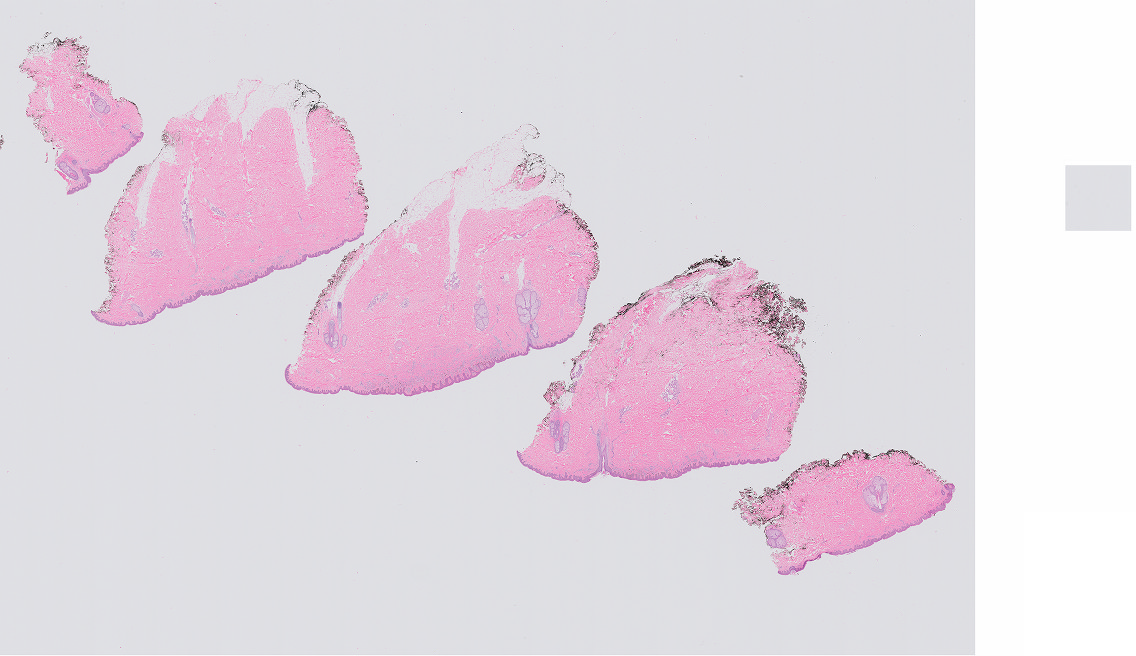

In [7]:
fixed_thum_divisor = find_thumb_nail_scale_divisor(fixed_obj.dimensions[1], fixed_obj.dimensions[0])
fixed_thumb_height = fixed_obj.dimensions[1] // fixed_thum_divisor
fixed_thumb_width = fixed_obj.dimensions[0] // fixed_thum_divisor
tru_thumb_x = tru_x / fixed_thum_divisor
tru_thumb_y = tru_y / fixed_thum_divisor
print(tru_thumb_x, tru_thumb_y)
print(type(fixed_obj), fixed_obj.dimensions, fixed_thumb_width, fixed_thumb_height)
fixed_im = fixed_obj.get_thumbnail((fixed_thumb_width, fixed_thumb_height))
print(fixed_im.size)
display(fixed_im)

<class 'openslide.OpenSlide'> (126976, 75776) 1984 1184
(1984, 1184)


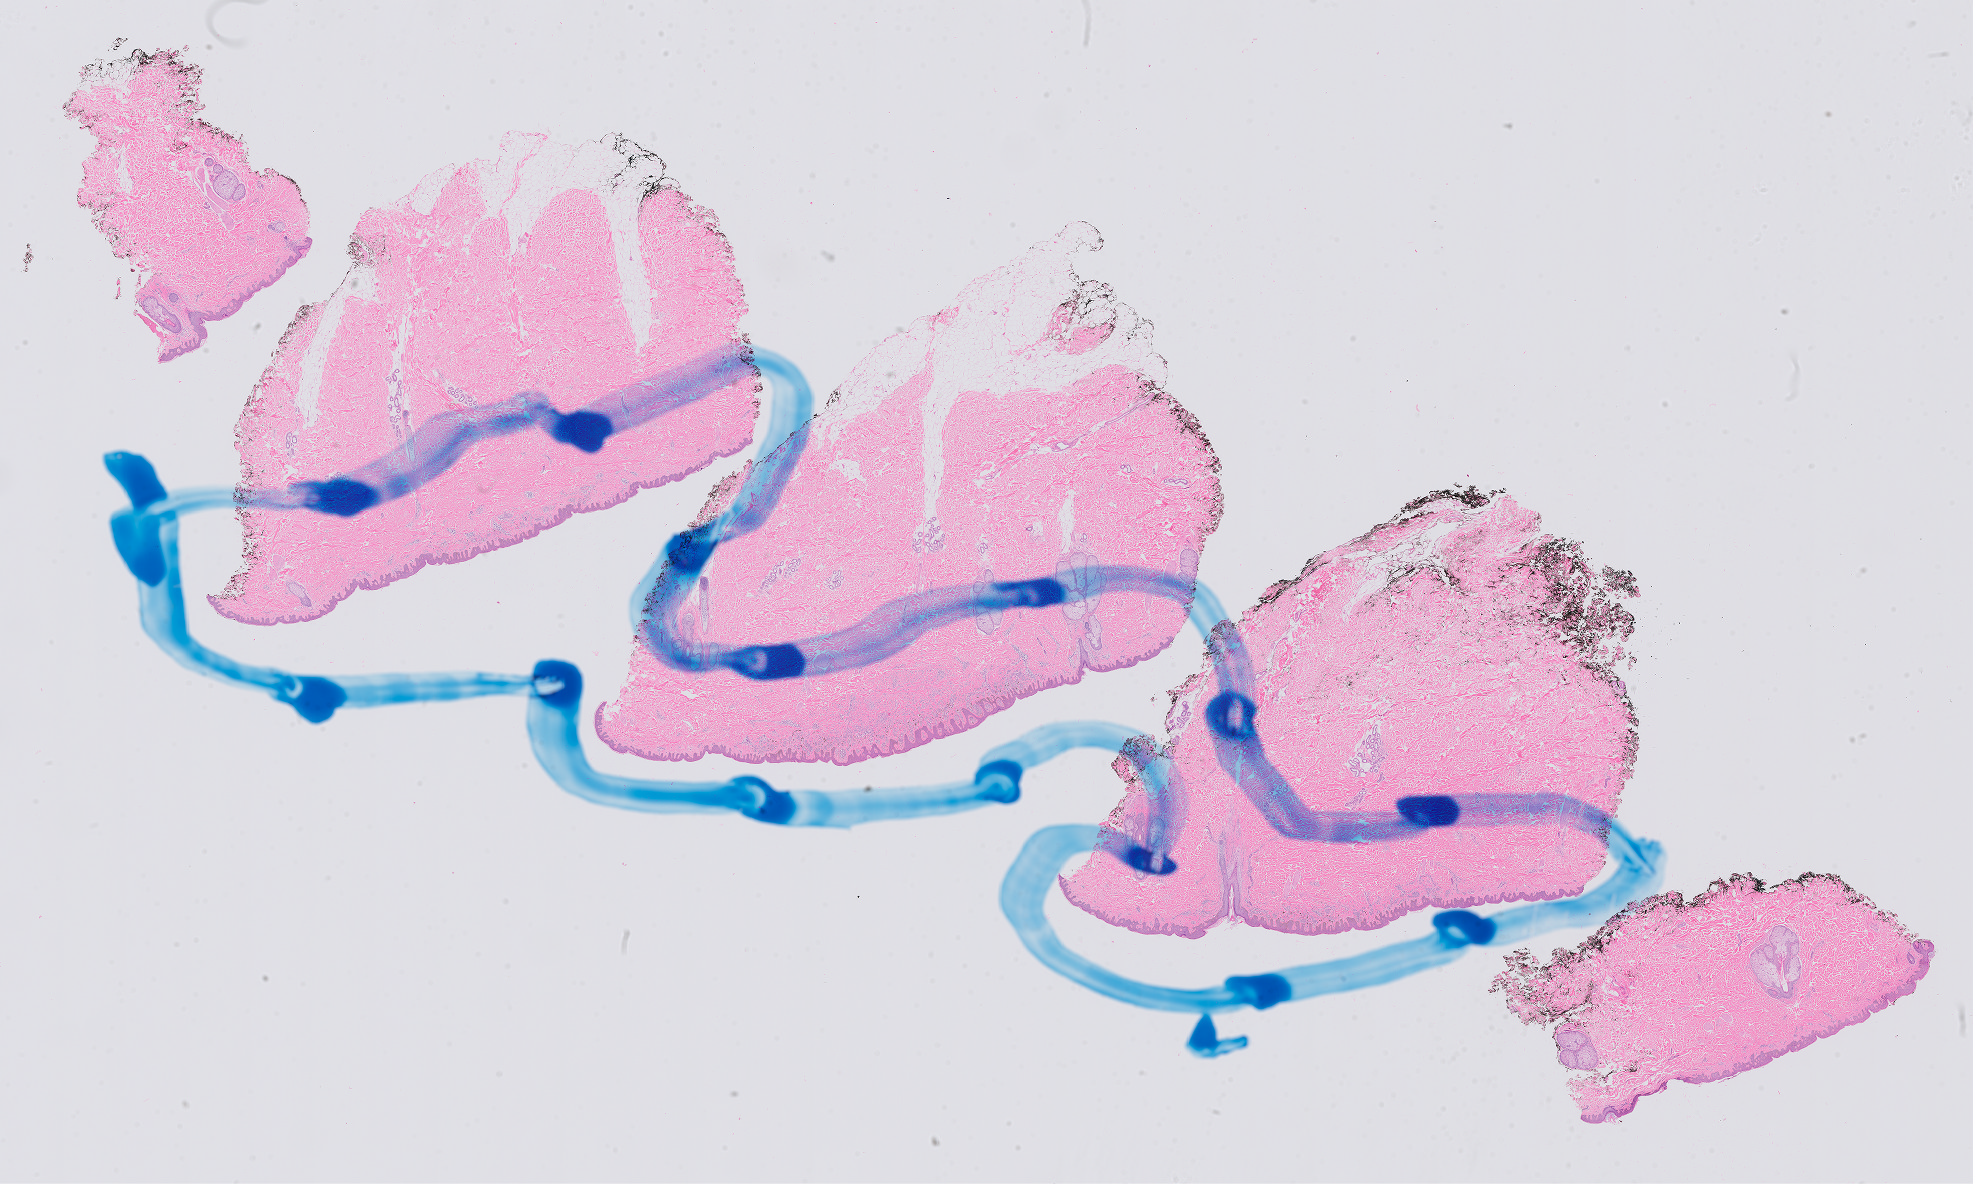

In [8]:
float_thum_divisor = find_thumb_nail_scale_divisor(float_obj.dimensions[1], float_obj.dimensions[0])
float_thumb_height = float_obj.dimensions[1] // float_thum_divisor
float_thumb_width = float_obj.dimensions[0] // float_thum_divisor
print(type(float_obj), float_obj.dimensions, float_thumb_width, float_thumb_height)
float_im = float_obj.get_thumbnail((float_thumb_width, float_thumb_height))
print(float_im.size)
display(float_im)

(14540, 14540) 
 (16212, 12922)


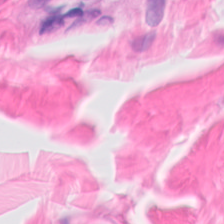

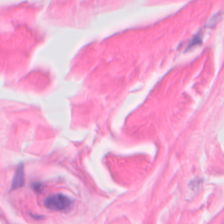

(None, None)

In [9]:
"""
            Examine offset fidelity using         tru_x and tru_y
"""
patch_size = (224,224)
xy = 145408 // 10

fixed_patch_location = (xy, xy)
float_patch_location = (np.int(xy + tru_y), np.int(xy + tru_x))
print(fixed_patch_location, '\n', float_patch_location)
fixed_patch = fixed_obj.read_region(level=0, size=patch_size, location=fixed_patch_location)
fixed_patch = fixed_patch.convert('RGB')

float_patch = float_obj.read_region(level=0, size=patch_size, location=float_patch_location)
float_patch = float_patch.convert('RGB')

display(fixed_patch), display(float_patch)

(14540, 14540) 
 (16215, 12919)


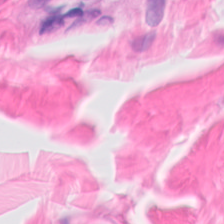

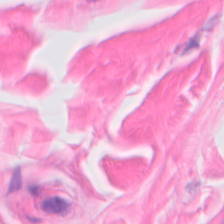

(None, None)

In [10]:
"""
            Examine offset fidelity using         auto_x and auto_y
"""
patch_size = (224,224)
xy = 145408 // 10

fixed_patch_location = (xy, xy)
float_patch_location = (np.int(xy + auto_y), np.int(xy + auto_x))
print(fixed_patch_location, '\n', float_patch_location)
fixed_patch = fixed_obj.read_region(level=0, size=patch_size, location=fixed_patch_location)
fixed_patch = fixed_patch.convert('RGB')

float_patch = float_obj.read_region(level=0, size=patch_size, location=float_patch_location)
float_patch = float_patch.convert('RGB')

display(fixed_patch), display(float_patch)

## Close but not close enough